In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud=pd.read_csv("C:\\Users\\HP\\Downloads\\Fraud_Check.csv")

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [5]:
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [6]:
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [7]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [8]:
fraud = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)

In [9]:
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


In [10]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
fraud_norm = norm_func(fraud.iloc[:,1:])
fraud_norm.head(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
5,0.520710,0.000000,0.0,0.0,0.0,0.0,1.0
6,0.316732,0.266667,0.0,0.0,0.0,1.0,1.0
7,0.606176,0.100000,1.0,0.0,1.0,1.0,1.0
8,0.440819,0.400000,0.0,0.0,1.0,1.0,1.0
9,0.745424,0.133333,1.0,0.0,0.0,1.0,1.0


In [12]:
X = fraud_norm.drop(['TaxInc_Good'], axis=1)
y = fraud_norm['TaxInc_Good']

In [26]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
fraud_norm["income"]="<=30000"
fraud_norm.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud_norm.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [16]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [22]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [23]:
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [24]:
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.3,stratify = labels)

In [27]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

E:\softwares\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\softwares\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [28]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

2

In [29]:
model.n_outputs_

1

In [30]:
model.oob_score_

0.5285714285714286

In [31]:
prediction = model.predict(x_train)

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [33]:
np.mean(prediction == y_train)

0.9904761904761905

In [34]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [37]:
pred_test = model.predict(x_test)

In [38]:
acc_test =accuracy_score(y_test,pred_test)

In [39]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [40]:
from sklearn import tree

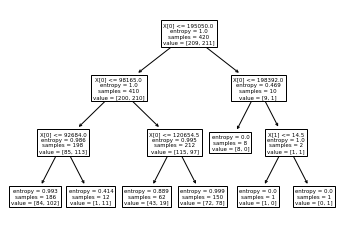

In [41]:
tree.plot_tree(model);

In [43]:
colnames = list(fraud.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

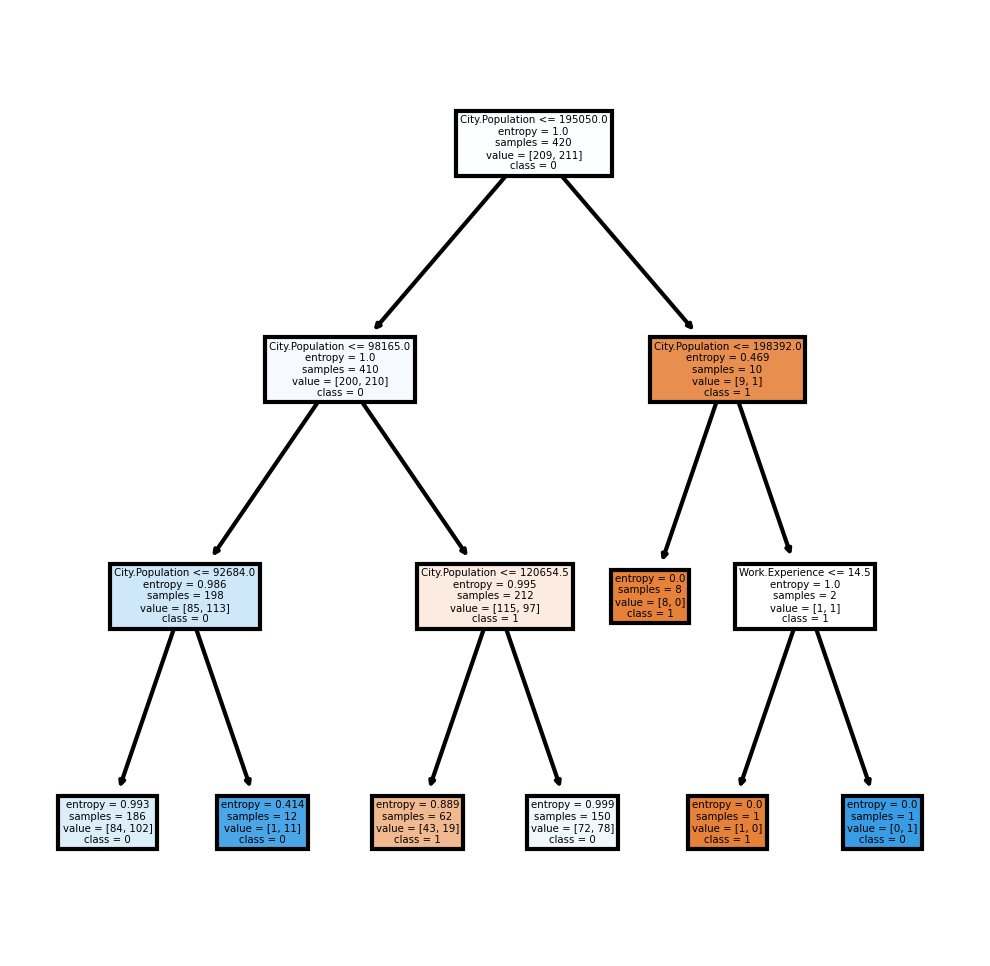

In [44]:
fn=['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [45]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

1    155
0     25
dtype: int64

In [46]:
preds

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1], dtype=uint8)

In [47]:
pd.crosstab(y_test,preds)

col_0,0,1
Urban_YES,,
0,13,76
1,12,79


In [48]:
np.mean(preds==y_test)

0.5111111111111111

In [49]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [50]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5111111111111111

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
array = fraud.values
X = array[:,0:3]
y = array[:,3]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [56]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
model.score(X_test,y_test)

-0.9162779850746272